# Homework 3

## James Jefferies

Instructions: 

 1. Please replace "Yourname" above, and in the title of this notebook. 
 2. Import all the libraries you end up using in the cell below. Please only use those libraries which we have used in class (i.e. nltk, collections, pandas, etc.). 
 3. Complete all the exercises, replacing "enter code here" with your code, and "enter markdown here" with your markdown. Annotate with comments (lines beginning with `#`) or with markdown cells, to show how you arrived at your answers.  
 4. From the Kernel menu, select "restart and run all." This will help me to see the output of your answers. 
 5. Email me your completed notebook: jonathan.reeve@columbia.edu


In [2]:
# Import your libraries here. 
import nltk
import pandas as pd
from collections import Counter

# For mini project
from nltk.corpus import wordnet as wn

# For mini project
import matplotlib._color_data as mcd

### 1. Find the longest word in _The Moonstone_. 

In [2]:
# Enter your code here. 
moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()

def removePunctuation(text):
    """Remove punctuation"""
    for punct in "!@#$%^&*():;-’“”,\n\xa0.?\"\'–":
        text = text.replace(punct, ' ')
    return text

moonstoneNoPunct = removePunctuation(moonstone)

moonstoneList = moonstoneNoPunct.split(' ')
wordSet = set(moonstoneList)

moonstoneTokens = nltk.word_tokenize(moonstone)
moonstoneTokensNoPunct = nltk.word_tokenize(moonstoneNoPunct)

def findLongestThing(listOfThings):
    """Create a dictionary of things and their lengths, find the index of the longest thing and return the thing"""
    # I did this originally for words, but of course it will also work for sentences, so renamed and variables renamed!
    thingListAndLength = { thing: len(thing) for thing in listOfThings }
    
    # I'm sure there would be a way to do this smarter and with more efficency, but this way does work!
    thingList = list(thingListAndLength.keys())
    thingLength = list(thingListAndLength.values())

    indexOfLongestThing = thingLength.index(max(thingLength))

    return thingList[indexOfLongestThing]

# Could we do a version of this using enumerate, to get the index?

print(f"Result from using a simple set of the text, split on space without punctuation: {findLongestThing(wordSet)}")
print(f"Result from tokenising with nltk without punctuation: {findLongestThing(moonstoneTokensNoPunct)}")


Result from using a simple set of the text, split on space without punctuation: misunderstandings
Result from tokenising with nltk without punctuation: misunderstandings


I ran this twice, once just splitting the text on space, another using nltk's tokeniser - just to compare.

### 2. Find the longest sentence in _The Moonstone_. Who is the speaker or narrator of that sentence? 

In [3]:
# Enter your code here. 

def removeNewLinesAndRandomChars(text):
    """Remove new lines and random characters"""
    for punct in "\n\xa0":
        text = text.replace(punct, ' ')
    return text

moonstoneSentences = nltk.sent_tokenize(removeNewLinesAndRandomChars(moonstone))

findLongestThing(moonstoneSentences)



'On this, the disconnected words, and fragments of sentences, which had dropped from Mr. Candy in his delirium, appeared as follows:  “… Mr. Franklin Blake … and agreeable … down a peg … medicine … confesses … sleep at night … tell him … out of order … medicine … he tells me … and groping in the dark mean one and the same thing … all the company at the dinner-table … I say … groping after sleep … nothing but medicine … he says … leading the blind … know what it means … witty … a night’s rest in spite of his teeth … wants sleep … Lady Verinder’s medicine chest … five-and-twenty minims … without his knowing it … to-morrow morning … Well, Mr. Blake … medicine to-day … never … without it … out, Mr. Candy … excellent … without it … down on him … truth … something besides … excellent … dose of laudanum, sir … bed … what … medicine now.”  There, the first of the two sheets of paper came to an end.'

So this is during Franklin's narration (the 3rd Narration) - when he's getting the info from Ezra Jenning's and his notebook - so it's Franlkin's narration, Ezra's notebook of Candy's words!

### 3. Find the longest n-gram in _The Moonstone_ that occurs at least four times. What you do notice about it? 

In [4]:
# Enter your code here. 
moonstoneTrigrams = nltk.ngrams(moonstoneTokensNoPunct, 3)

def commonNgrams(tokens, n):
    ngrams = nltk.ngrams(tokens, n)
    ngramsList = list(ngrams)
    return Counter(ngramsList).most_common(20)

# Start it off with tri-grams, I think there is probably a better way to do this
# without seeding the while loop. It works for now!
counter = 3
thisList = commonNgrams(moonstoneTokensNoPunct, counter)

while thisList[0][1] > 4:  # Once we don't get any with 4, we stop
    counter = counter + 1
    thisList = commonNgrams(moonstoneTokensNoPunct, counter)
    
# Trim the list to show us the nGrams appearing 4 times or more.
trimmedList = [item for item in thisList if item[1] >= 4]

for nGram in trimmedList:
    print(f"nGram of {counter} appearing 4 times or more: {nGram[0]}")


nGram of 7 appearing 4 times or more: ('time', 'of', 'which', 'I', 'am', 'now', 'writing')
nGram of 7 appearing 4 times or more: ('It', 'is', 'needless', 'to', 'say', 'that', 'I')


*time of which I am now writing* - seems like an odd expression to appear so often. We might write, at this time of writing? Looks like Betteredge said it twice, but also Miss Clack & Franklin. Is this the right expression from those narrators, or is it Wilike Collins coming through?

*It is needlesss to say that I* - for something which doesn't require saying, it does get said 4 times in this way! I spotted as well, a *It is needless to say again that I* which is an interesting variant, coming just after *it is needless to say that I*

### 4. Find a pattern, of 2-5 words, at least one of which is a part of speech, that occurs at least twice in _The Moonstone_. For example, you might look for JJS-NN (superlative - noun), very-JJ-NNP ("very" - adjective - proper noun), or '.'-CC (a period followed by a coordinating conjunction). What do you notice about your findings?

In [5]:
# Read the file, do the tagging
moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()
moonstoneTokens = nltk.word_tokenize(moonstone.lower())
moonstoneTagged = nltk.pos_tag(moonstoneTokens)


In [6]:
def wordTagSearch(taggedInput, itemOne, itemTwo, itemThree=None):
    """Pass in the tagged input and three words or tags. Determine whether it is a tag by whether it is upper case or not - then attempt to match."""
    outputList = []
    
    for i, wordTagPair in enumerate(taggedInput):
 
        if i == len(taggedInput) - 3: 
            break
           
        word, tag = wordTagPair
        nextWord, nextTag = taggedInput[i+1]
        nextNextWord, nextNextTag = taggedInput[i+2]
        
        if (((itemOne.isupper() and itemOne == tag) or (itemOne == word)) 
        and ((itemTwo.isupper() and itemTwo == nextTag) or (itemTwo == nextWord)) 
        and (itemThree == None or (itemThree.isupper() and itemThree == nextNextTag) or (itemThree == nextNextWord))):

            outputList.append([word, nextWord, nextNextWord])
        
    return outputList

In [7]:
Counter([' '.join(words) for words in wordTagSearch(moonstoneTagged, '.', 'CC')]).most_common(10)

[('. but ,', 32),
 ('. but i', 31),
 ('. and i', 27),
 ('. but the', 22),
 ('. “ come', 14),
 ('. and then', 13),
 ('. “ as', 13),
 ('. and the', 11),
 ('. but there', 11),
 ('. but it', 11)]

Example given above, . and CC. Interesting to see so many sentences stating with but and and - I thought it was usually considered bad form to do this, but maybe it works fine in Victorian narration")

In [8]:
Counter([' '.join(words) for words in wordTagSearch(moonstoneTagged, 'JJS', 'NN')]).most_common(10)

[('dearest rachel ,', 3),
 ('slightest effect on', 3),
 ('earliest convenience .', 2),
 ('manifest usefulness ,', 2),
 ('greatest pleasure .', 2),
 ('speediest way of', 2),
 ('earliest period at', 2),
 ('longest tongue and', 1),
 ('shortest temper of', 1),
 ('nicest boy that', 1)]

Example given above, JJS and NN. I have to say that manifest usefulness is a cracker of a phrase - I'm expecting it to be Miss Clack (it is!)





In [19]:
Counter([' '.join(words) for words in wordTagSearch(moonstoneTagged, 'I', 'believe')]).most_common(10)

[]

I wanted to look for I believe as well, but it doesn't seem to come under PRP in this POS tagging system - took me a while to work that out.

In [10]:
Counter([' '.join(words) for words in wordTagSearch(moonstoneTagged, 'very', 'JJ', 'NNP')]).most_common(10)


[('very good–let ’', 1)]

This example was given above too, I couldn't get it to work with a noun in there, NNP or NNPS - just got the one result

In [11]:
Counter([' '.join(words) for words in wordTagSearch(moonstoneTagged, 'very', 'JJ')]).most_common(10)

[('very good .', 8),
 ('very good ,', 3),
 ('very uneasy about', 2),
 ('very pleasant dinner', 2),
 ('very unfit ,', 1),
 ('very satisfactory to', 1),
 ('very poor purpose', 1),
 ('very inferior handkerchief', 1),
 ('very quiet ,', 1),
 ('very wretched ;', 1)]

Running without the noun on the end, brought up a few more results - still, less than I would have expected. A couple of very uneasy abouts - and a single inferior handkerchief!

### 5. Write two paragraphs where you describe one or two ideas for a final project. What text(s) will you analyze? What technologies will you use? What literary questions do you hope to answer? This doesn't have to be your final decision. 

Project ideas:

One of my favourite bands (The Wedding Present) also have an alternative band (Cinerama), the main singer/songwriter of both is David Gedge - I'd be quite interested to take a look at the collected lyrics from the two bands to compare to see if there are differences which can be picked out. Is one band more 'romantic' than the other - does the complexity of the lyrics change over time and maybe there are some other things to notice. I was thinking that some kind of sentiment analysis would work here, but we've not covered that yet in the course, so maybe I won't have the right tools to do this yet.

Always back to Iris Murdoch - I've got the text of 25 of her 26 novels, so I could make a good stab at doing some analysis across her novel writing career. Whether that's doing further analysis on vocabulary used, or common expressions in there across many of them. I'm not too sure yet. Creating a dictionary with all the text of the novels would be a starting point, allowing me to loop over them and do analysis on each one. Maybe building on the TTR ratios work, that could be interesting. Also, doing some nGram analysis - are there expressions used across all the novels? Or do some get heavily repeated in certain ones.

The colour analysis is also something I'm still interested in. I've been interested in doing something similar to the haskell prototype you kindly shared, but for a final project, maybe doing some visualisations - looking at the course notes, I can see that it's a maximum of three figures, so I'd need to choose carefully. Mini project question 1 is useful for this too, now I've worked out how to map the hex values of a colour to it's name. I might do this on one of the Iris Murdoch novels which has a lot of colour in it, Nuns and Soldiers.

Might be interesting to plot light and dark in the novels too.

I quite like John Buchan as an author, so maybe thinking about The Thirty-Nine steps but not sure what analysis I'd do with that..



### 6-8. Choose ONE of the following mini-projects to complete. Make sure that in each case, you discuss your results in well-formatted markdown. 

1. Make a big list of color words using WordNet, and then use that to find the predominant color of "The Garden Party," in terms of color words. Then, in one paragraph, interpret your results in terms of the story. Make a visualization of your results. (You can get the colors right with something like pandas `DataFrame.plot(kind="pie", colormap="your-colors-here")`. You might have to read a little about how to use color maps.)

2. Make a function to calculate the ratio of male pronouns to female pronouns. Then use that to test the male/female pronoun ratio of each narrator (you can treat Betteredge's and Blake's two narratives as one, if you want). Create a chart with your results. 

3. Calculate how proportions of parts of speech are different for each narrator in _The Moonstone_. Do any narrators stand out in their usage of certain parts of speech? Discuss your results, and support your findings with a few examples from the text. Create a bar chart with your results. 

4. Categorize the nouns (or verbs, or another POS) of _The Moonstone_, by getting their WordNet hypernyms. (Choose any `min_depth()` you find most meaningful.) Create a visualization with your results. 

5. Download a few more Collins novels. What are the words that appear in _The Moonstone_ more than other novels of Collins's? (Be sure to use frequencies, rather than raw counts.) If you disregard proper names ('NNP' in terms of POS), what are the remaining distinctive words? 

#### Mini project number 1

In [12]:
# Method 1 for getting a list of colours, I tried this at first, but it only had 80 odd colours in the list
# then I remembered the work on WordNet and Lemmas and trees..

def getHyponym(word):
    return word.hyponyms()

def getHypernym(word):
    return word.hypernyms()

def getColoursFromHighLevel(name):  
    colours = []
    synsets = wn.synsets(name)
    for hypernym in synsets:
        for h in getHyponym(hypernym):
            colours.append(h.name())
            for a in getHyponym(h):
                colours.append(a.name())
                
    # Remove the bits of the name we don't need
    colours = [colour.split('.')[0] for colour in colours]
    colours.sort()
    
    return colours
   
colors1 = getColoursFromHighLevel('chromatic_color')
colors2 = getColoursFromHighLevel('achromatic_color')
allColours = colors1 + colors2
allColours.sort()
allColours = [colour.replace('_',' ') for colour in allColours]


In [1]:
# Method 2 for getting colours
# From WordNet lecture on lemmas and trees
def isSynset(node): 
    return type(node) == nltk.corpus.reader.wordnet.Synset

def getLemmas(tree): 
    """From lecture notes, walk through the tree getting all the lemmas from a tree"""
    allLemmas = []
    for node in tree: 
        if isSynset(node): 
            nodeLemmas = node.lemma_names()
            for lem in nodeLemmas: 
                allLemmas.append(lem)
        else: 
            nodeLemmas = getLemmas(node)
            for lem in nodeLemmas: 
                allLemmas.append(lem)
    return allLemmas

# Find 'colour' by using blue, then heading up the tree 
colour = wn.synsets('blue')[0].hypernyms()[0].hypernyms()[0]

# Get tree from colour
colourTree = colour.tree(rel=getHyponym)
colours = getLemmas(colourTree)

tidiedColoursFromLemmas = [colour.replace('_',' ') for colour in colours]
tidiedColoursFromLemmas.sort()

# Remove these two as they appear in the count, but aren't really colours themselves
tidiedColoursFromLemmas.remove('colour')
tidiedColoursFromLemmas.remove('shade')

NameError: name 'wn' is not defined

In [14]:
# Now we have the list of colours, we can do some analysis on the garden party
gardenPartyTotal = open('../Readings/Content/texts/garden-party.md', encoding="utf8").read()
gardenParty = gardenPartyTotal[74254:104246]

gardenTokens = nltk.word_tokenize(gardenParty.lower())

colourCount = {}

# Simple dictionary count of the colours and their frequency
for token in gardenTokens:
    for colour in tidiedColoursFromLemmas:
        if token == colour:
            if token in colourCount:
                colourCount[token] = colourCount[token] + 1
            else:
                colourCount[token] = 1

colourCountDF = pd.Series(colourCount)

# Sanity check
print(colourCountDF)

blue         2
gold         2
green        4
coffee       2
straw        1
yellow       1
lavender     2
white        2
silver       2
pink         2
crimson      1
olive        3
chocolate    1
brown        1
black        3
red          1
dtype: int64


In [15]:
def translateColoursToHex(listColourNames):
    """"Take a list of colour names ['red','blue','green'] and return hex list"""
    hexList = []
    for colourName in listColourNames:
        xkcdName = f"xkcd:{colourName}"
        if xkcdName in mcd.XKCD_COLORS:
            hexList.append(mcd.XKCD_COLORS[xkcdName])
        else:
            print("Not found" + colourName)

    return hexList

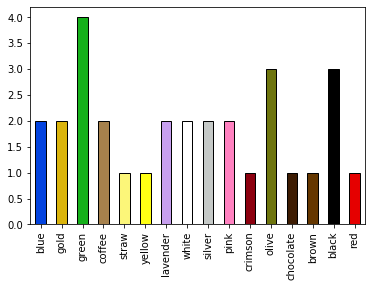

In [16]:
hexColours = translateColoursToHex(colourCountDF.keys())

colourCountDF.plot(kind='bar', color=hexColours,edgeColor='black')


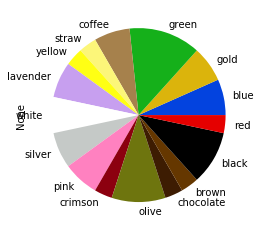

In [17]:
colourCountDF.plot(kind='pie', colors=hexColours)

##

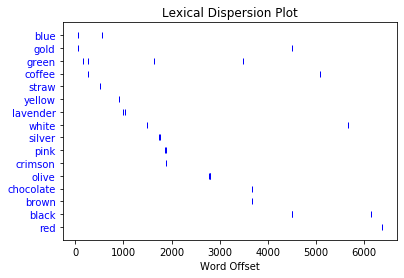

In [18]:
gardenPartyText = nltk.Text(gardenTokens, name="Garden Party")
gardenPartyText.dispersion_plot(list(colourCountDF.keys()))


# Comments on the visualistion

Green is the most frequently used colour word in the Garden Party, a word you would expect when talking about gardens, maybe more than it has been used. It is used in the first and middle parts of the story, which is generally true for all of the softer colours, blue, straw, yellow, pink etc. Towards the end of the story though, when we experience the tragedy of the worker who died, we start to see brown, black and red appear - harder and more troubling colours.